$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Neural Networks

Joseph Griffith

## Overview
I will train various neural network configurations on two sets of data, to do regression and classification, in order to find which configurations work best for each.

# Functions - 

In [15]:
import neuralnetworks as nn
import numpy as np

In [ ]:
#returns results which is list with one element for each network structure tested. Each element is a list containing
   #the hidden layer structure (as a list),
   #a list of training data performance for each repetition,
   #a list of testing data performance for each repetition, and
   #the number of seconds it took to run this many repetitions for this network structure.

#X is a matrix of input data of shape nSamples x nFeatures
#T is a matrix of target data of shape nSamples x nOutputs
#trainFraction is fraction of samples to use as training data. 
   #1-trainFraction is number of samples for testing data
#hiddenLayerStructures is list of network architectures. 
   #For example, to test two networks, one with one hidden layer of 20 units, and one with 3 hidden layers with 
       #5, 10, and 20 units in each layer, this argument would be [[20], [5, 10, 20]].
#numberRepetitions is number of times to train a neural network. 
   #Calculate training and testing average performance (two separate averages) of this many training runs.
#numberIterations is the number of iterations to run the scaled conjugate gradient algorithm when a 
   #neural network is trained.
#classify is set to True if you are doing a classification problem, in which case T must be a single column of 
   #target class integers.

In [3]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify):
    import mlutils as ml 
    from time import time as tm
    #[ [ [hidden structure element 0], [each rep train error], [each rep test error], total seconds ],
    #     ...
    #  [ [hidden structure element n], [each rep train error], [each rep test error], total seconds ] ]
    results = []
    for hidden in hiddenLayerStructures:
        start = tm()
        #results.append(hidden)
        #print('hidden: ', hidden)
        structure = []
        structure.append(hidden)
        trainE = []
        testE = []
        for rep in range(numberRepetitions):
            #see 2017/11/16 lecture ~40min for use/results!
            Xtrain, Ttrain, Xtest, Ttest = ml.partition(X,T,(trainFraction, 1-trainFraction), classify)
            #print('partition check: ', Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape)
            #Create a neural network of the given structure
            if classify:
                nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], hidden, len(np.unique(Ttrain)))
            else:
                nnet = nn.NeuralNetwork(Xtrain.shape[1], hidden, Ttrain.shape[1]) 
            #Train it for numberIterations
            nnet.train(Xtrain, Ttrain, numberIterations) #, True)
            #Use the trained network to produce outputs for the training and for the testing sets
            Ytrain = nnet.use(Xtrain)
            Ytest = nnet.use(Xtest)
            #If classifying, calculate the fraction of samples incorrectly classified for training and testing sets
            # (# of samples incorrectly classified) / (total # samples)
            if classify:
                #Count the number of samples in the output from use() that do not agree with the corresponding 
                #values in Train, if you use()'d Xtrain as input, and in Xtest if you use()'d Xtest as input.
                #Performance is now count of number of train (or test) samples incorrectly classified.  
                #Done by comparing out of the use() method with the target labels in T.
                
                #print('classify train wrong: ', np.sum(Ytrain != Xtrain), ', len(train): ', len(Xtrain))
                #print('classify test wrong: ', np.sum(Ytest != Ttest), ', len(test): ', len(Ttest))
                trainError = np.sum(Ytrain != Xtrain)/len(Xtrain)
                testError = np.sum(Ytest != Ttest)/len(Ttest)
                #print('classify errors train: ', trainError, ', test: ', testError)
            #Otherwise, calculate the RMSE of training and testing sets.
            else:
                trainError = np.sqrt(np.mean((Ytrain-Ttrain)**2))
                testError = np.sqrt(np.mean((Ytest-Ttest)**2))
                #print('regression errors train: ', trainError, ', test: ', testError)
            #Add the training and testing performance to a collection (such as a list) for this network structure
            trainE.append(trainError)
            testE.append(testError)
        #Add to a collection of all results the hidden layer structure, lists of training performance and 
            #testing performance, and seconds taken to do these repetitions.
        structure.append(trainE)
        structure.append(testE)
        structure.append(tm()-start)
        results.append(structure)
    return results

In [4]:
#returns a list of lists like results but with the list of training performances replaced by their mean and 
    #the list of testing performances replaced by their mean.
    #[[Hidden Layers], Average RMSE Training, Average RMSE Testing, seconds]
def summarize(results):
    summary = []
    for i in range(len(results)):
        summary.append(results[i])
        summary[i][1] = sum(results[i][1])/len(results[i][1])
        summary[i][2] = sum(results[i][2])/len(results[i][2])        
    return summary

In [5]:
#returns the best element of results, determined by the element that has the smallest test performance.
def bestNetwork(summary):
    best = summary[0]
    for i in range(1, len(summary)):
        best = summary[i] if summary[i][2] < best[2] else best
    return best

#### Random Tests

Checking default function argument behavior

In [6]:
def test(a=True, b=False):
    print(a, b)

In [7]:
test()

True False


In [8]:
test(True, True)

True True


Checking range behavior

In [9]:
for i in range(1, 5):
    print(i)

1
2
3
4


Matrix multiplication tests

In [16]:
A = np.array([1,3,5,7,9,11]).reshape(2,3)
A

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [17]:
B = np.array([2,4,6])
B

array([2, 4, 6])

In [18]:
A@B

array([ 44, 116])

In [19]:
C = np.array([2,4,6,8,10,12]).reshape(2,3)
C = C.transpose()
C

array([[ 2,  8],
       [ 4, 10],
       [ 6, 12]])

In [20]:
A@C

array([[ 44,  98],
       [116, 278]])

In [21]:
np.random.uniform(-1, 1, size=(3,2))

array([[-0.9053326 ,  0.05578581],
       [ 0.05735234, -0.19576288],
       [-0.02328595,  0.76768021]])

In [22]:
D = np.array([1, 2, 3, 4, 5, 11]).reshape(2,3)
(A == D)

array([[ True, False, False],
       [False, False,  True]], dtype=bool)

In [23]:
np.sum(A == D)

2

# Parsing Data

In [24]:
import pandas as pan
import numpy as np
#import pandas.io.data as web

##### Parsing Energy Data

In [25]:
energy = pan.read_csv('energydata_complete.csv')
#energy = energy
del energy['date']
del energy['rv1']
del energy['rv2']
energy.head().transpose()

,0,1,2,3,4
Appliances,60.000000,60.000000,50.000000,50.000000,60.000000
lights,30.000000,30.000000,30.000000,40.000000,40.000000
T1,19.890000,19.890000,19.890000,19.890000,19.890000
RH_1,47.596667,46.693333,46.300000,46.066667,46.333333
T2,19.200000,19.200000,19.200000,19.200000,19.200000
RH_2,44.790000,44.722500,44.626667,44.590000,44.530000
T3,19.790000,19.790000,19.790000,19.790000,19.790000
RH_3,44.730000,44.790000,44.933333,45.000000,45.000000
T4,19.000000,19.000000,18.926667,18.890000,18.890000
RH_4,45.566667,45.992500,45.890000,45.723333,45.530000


In [26]:
energy.count()

Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
dtype: int64

In [27]:
enames = energy.columns
enames

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint'],
      dtype='object')

In [28]:
energy.shape

(19735, 26)

In [29]:
#no slicing dataframes
#energy[:2,:]

In [30]:
energy = np.array(energy)
energy[:2,:]   #no header info

array([[  60.        ,   30.        ,   19.89      ,   47.59666667,
          19.2       ,   44.79      ,   19.79      ,   44.73      ,
          19.        ,   45.56666667,   17.16666667,   55.2       ,
           7.02666667,   84.25666667,   17.2       ,   41.62666667,
          18.2       ,   48.9       ,   17.03333333,   45.53      ,
           6.6       ,  733.5       ,   92.        ,    7.        ,
          63.        ,    5.3       ],
       [  60.        ,   30.        ,   19.89      ,   46.69333333,
          19.2       ,   44.7225    ,   19.79      ,   44.79      ,
          19.        ,   45.9925    ,   17.16666667,   55.2       ,
           6.83333333,   84.06333333,   17.2       ,   41.56      ,
          18.2       ,   48.86333333,   17.06666667,   45.56      ,
           6.48333333,  733.6       ,   92.        ,    6.66666667,
          59.16666667,    5.2       ]])

In [31]:
Tenergy = energy[:,:2]
Xenergy = energy[:,2:]
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [32]:
eXnames = list(enames[2:])
eTnames = list(enames[:2])
eXnames

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [33]:
eTnames

['Appliances', 'lights']

##### Parsing Frog Data

In [34]:
frogs = pan.read_csv('Frogs_MFCCs.csv')
frogs.head().transpose()

,0,1,2,3,4
MFCCs_ 1,1,1,1,1,1
MFCCs_ 2,0.152936,0.171534,0.152317,0.224392,0.0878169
MFCCs_ 3,-0.105586,-0.0989747,-0.0829727,0.118985,-0.0683449
MFCCs_ 4,0.200722,0.268425,0.287128,0.329432,0.306967
MFCCs_ 5,0.317201,0.338672,0.276014,0.372088,0.330923
MFCCs_ 6,0.260764,0.268353,0.189867,0.361005,0.249144
MFCCs_ 7,0.100945,0.0608351,0.00871396,0.015501,0.00688371
MFCCs_ 8,-0.150063,-0.222475,-0.242234,-0.194347,-0.265423
MFCCs_ 9,-0.171128,-0.207693,-0.219153,-0.0981807,-0.1727
MFCCs_10,0.124676,0.170883,0.232538,0.270375,0.266434


In [35]:
frogs.count()

MFCCs_ 1    7195
MFCCs_ 2    7195
MFCCs_ 3    7195
MFCCs_ 4    7195
MFCCs_ 5    7195
MFCCs_ 6    7195
MFCCs_ 7    7195
MFCCs_ 8    7195
MFCCs_ 9    7195
MFCCs_10    7195
MFCCs_11    7195
MFCCs_12    7195
MFCCs_13    7195
MFCCs_14    7195
MFCCs_15    7195
MFCCs_16    7195
MFCCs_17    7195
MFCCs_18    7195
MFCCs_19    7195
MFCCs_20    7195
MFCCs_21    7195
MFCCs_22    7195
Family      7195
Genus       7195
Species     7195
RecordID    7195
dtype: int64

In [36]:
frogs['Species']

0       AdenomeraAndre
1       AdenomeraAndre
2       AdenomeraAndre
3       AdenomeraAndre
4       AdenomeraAndre
5       AdenomeraAndre
6       AdenomeraAndre
7       AdenomeraAndre
8       AdenomeraAndre
9       AdenomeraAndre
10      AdenomeraAndre
11      AdenomeraAndre
12      AdenomeraAndre
13      AdenomeraAndre
14      AdenomeraAndre
15      AdenomeraAndre
16      AdenomeraAndre
17      AdenomeraAndre
18      AdenomeraAndre
19      AdenomeraAndre
20      AdenomeraAndre
21      AdenomeraAndre
22      AdenomeraAndre
23      AdenomeraAndre
24      AdenomeraAndre
25      AdenomeraAndre
26      AdenomeraAndre
27      AdenomeraAndre
28      AdenomeraAndre
29      AdenomeraAndre
             ...      
7165       ScinaxRuber
7166       ScinaxRuber
7167       ScinaxRuber
7168       ScinaxRuber
7169       ScinaxRuber
7170       ScinaxRuber
7171       ScinaxRuber
7172       ScinaxRuber
7173       ScinaxRuber
7174       ScinaxRuber
7175       ScinaxRuber
7176       ScinaxRuber
7177       

In [37]:
temp = list(np.unique(frogs['Species']))
temp

['AdenomeraAndre',
 'AdenomeraHylaedactylus',
 'Ameeregatrivittata',
 'HylaMinuta',
 'HypsiboasCinerascens',
 'HypsiboasCordobae',
 'LeptodactylusFuscus',
 'OsteocephalusOophagus',
 'Rhinellagranulosa',
 'ScinaxRuber']

In [38]:
frogs = np.array(frogs)
frogs.shape

(7195, 26)

In [39]:
for i in temp:
    print(temp.index(i))

0
1
2
3
4
5
6
7
8
9


In [40]:
#taken from CS440 slides
def makeIndicatorVars(T):
    # Make sure T is two-dimensiona. Should be nSamples x 1.
    if T.ndim == 1:
        T = T.reshape((-1,1))    
    return (T == np.unique(T)).astype(int)

In [41]:
speciesMatrix = makeIndicatorVars(np.array(temp))
speciesMatrix

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [42]:
speciesMatrix.shape

(10, 10)

In [43]:
species = {}
for i in temp:
    species[i] = temp.index(i)
#species['HylaMinuta'] = 9
#species['ScinaxRuber'] = 3
species

{'AdenomeraAndre': 0,
 'AdenomeraHylaedactylus': 1,
 'Ameeregatrivittata': 2,
 'HylaMinuta': 3,
 'HypsiboasCinerascens': 4,
 'HypsiboasCordobae': 5,
 'LeptodactylusFuscus': 6,
 'OsteocephalusOophagus': 7,
 'Rhinellagranulosa': 8,
 'ScinaxRuber': 9}

In [44]:
#species entries correspond to speciesMatrix order
for i in species:
    print(speciesMatrix[species[i]])

[1 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 1]


In [45]:
Xanuran = []
#Xanuran = np.array(frogs[:,1:22])
Xanuran = np.array(frogs[:,1:22]).astype(float)
Xanuran[:2,:]

array([[ 0.1529363 , -0.1055859 ,  0.20072191,  0.31720106,  0.26076385,
         0.10094464, -0.1500626 , -0.17112763,  0.12467644,  0.18865415,
        -0.07562172, -0.15643593,  0.08224512,  0.13575204, -0.02401665,
        -0.10835111, -0.07762252, -0.0095678 ,  0.05768398,  0.11868014,
         0.01403845],
       [ 0.17153426, -0.09897474,  0.26842522,  0.33867186,  0.2683531 ,
         0.06083509, -0.22247464, -0.20769267,  0.17088287,  0.27095828,
        -0.09500394, -0.25434147,  0.02278623,  0.1633201 ,  0.01202228,
        -0.09097401, -0.05650952, -0.03530336,  0.02013996,  0.08226299,
         0.02905574]])

In [46]:
thing = []
thing.append(species['HylaMinuta'])
print(thing)
stuff = []
stuff.append(thing)
stuff.append(thing)
stuff

[3]


[[3], [3]]

In [47]:
names = np.array(frogs[:,24])
Tanuran = []
for i in names:
    each = []    
    each.append(species[i])
    Tanuran.append(each)
Tanuran = np.array(Tanuran)
Tanuran[:2]

array([[0],
       [0]])

In [48]:
Xanuran.shape, Tanuran.shape

((7195, 21), (7195, 1))

In [49]:
len(np.unique(Tanuran))
#Tanuran
#print(Tanuran)
#len(Tanuran)

10

In [50]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

### Testing Functions - 

#### Energy Data

In [52]:
Eresults = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, [5,5], [10, 10]], 10, 100, classify=False)
Eresults

[[0,
  [66.440226408746923,
   67.470740280710828,
   67.334675887498207,
   66.607551192823138,
   67.404598258554685,
   67.218626883416292,
   67.247827740914843,
   66.561549001164877,
   67.031068924277719,
   67.721143533528362],
  [70.015391169818244,
   65.95677452872782,
   66.495897475901771,
   69.386996074046138,
   66.225357520134324,
   66.971055550673597,
   66.860321056066468,
   69.584073199190314,
   67.707823688519099,
   64.910160353943382],
  1.3082256317138672],
 [5,
  [66.123298587278327,
   65.686131179935771,
   65.264997362398745,
   65.213106214032237,
   65.831081351459886,
   65.450273418594563,
   65.845044918383948,
   65.325839685085384,
   65.208161051221694,
   65.011359376673738],
  [64.824165232533034,
   66.718373672434666,
   66.531669562833784,
   65.138388849691836,
   66.536557720488318,
   67.628480868552941,
   67.02528004416736,
   67.11918299089632,
   67.637055151170728,
   66.029684528365408],
  21.911864757537842],
 [[5, 5],
  [65.4666222

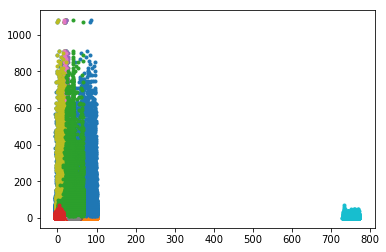

In [73]:
plt.plot(Xenergy, Tenergy, '.');

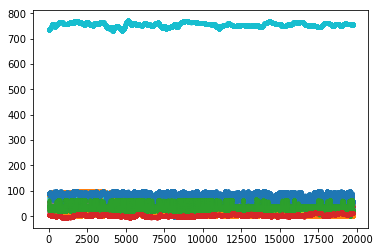

In [74]:
plt.plot(Xenergy, '.');

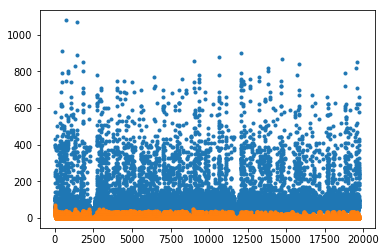

In [76]:
plt.plot(Tenergy, '.');

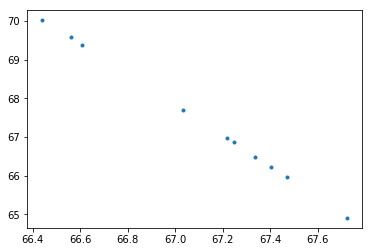

In [54]:
plt.plot(Eresults[0][1], Eresults[0][2], '.');

In [55]:
Esummary = summarize(Eresults)
Esummary
#[[Hidden Layers], Average RMSE Training, Average RMSE Testing, seconds]

[[0, 67.10380081116358, 67.41138506170212, 1.3082256317138672],
 [5, 65.495929314506427, 66.518883862113427, 21.911864757537842],
 [[5, 5], 64.832735976321402, 65.129179772411959, 29.92308497428894],
 [[10, 10], 63.044685911635419, 64.347971211693789, 53.89591693878174]]

In [56]:
Ebest = bestNetwork(Esummary)
Ebest

[[10, 10], 63.044685911635419, 64.347971211693789, 53.89591693878174]

#### Frogs Data

In [57]:
Fresults = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5]], 5, 100, True)
Fresults

[[0,
  [20.9954829742877,
   20.996177901320362,
   20.996525364836693,
   20.9954829742877,
   20.9954829742877],
  [0.038220986796386379,
   0.034746351633078529,
   0.041695621959694229,
   0.035441278665740095,
   0.035441278665740095],
  2.5529024600982666],
 [5,
  [20.996699096594856,
   20.996177901320362,
   20.995656706045864,
   20.996004169562195,
   20.996525364836693],
  [0.042390548992355802,
   0.062543432939541344,
   0.046560111188325225,
   0.053509381514940932,
   0.045170257123002086],
  6.168088912963867],
 [[5, 5],
  [20.996177901320362,
   20.996177901320362,
   20.995656706045864,
   20.996004169562195,
   20.996177901320362],
  [0.050729673384294648,
   0.072272411396803335,
   0.049339819318971509,
   0.041000694927032663,
   0.052814454482279359],
  7.655649900436401]]

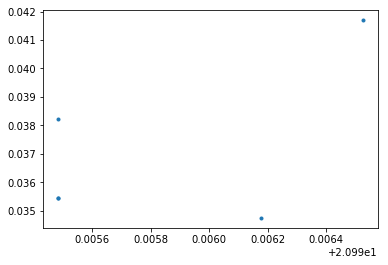

In [58]:
plt.plot(Fresults[0][1], Fresults[0][2], '.');

In [59]:
Fsummary = summarize(Fresults)
Fsummary
#[[Hidden Layers], Average RMSE Training, Average RMSE Testing, seconds]

[[0, 20.995830437804031, 0.037109103544127865, 2.5529024600982666],
 [5, 20.996212647671996, 0.050034746351633089, 6.168088912963867],
 [[5, 5], 20.996038915913829, 0.0532314107018763, 7.655649900436401]]

In [60]:
Fbest = bestNetwork(Fsummary)
Fbest

[0, 20.995830437804031, 0.037109103544127865, 2.5529024600982666]

### Trying NN Configs

#### Energy

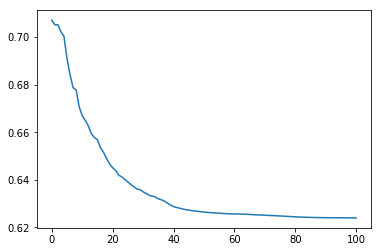

In [186]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], 2, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 100)
plt.plot(Enet.getErrorTrace(), '-');

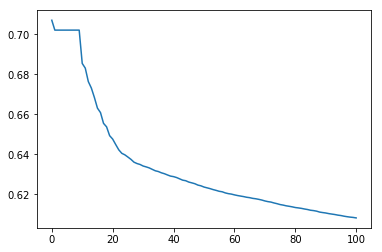

In [187]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], 10, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 100)
plt.plot(Enet.getErrorTrace(), '-');

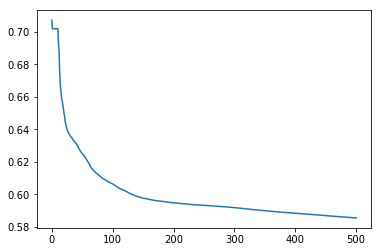

In [188]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], 10, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 500)
plt.plot(Enet.getErrorTrace(), '-');

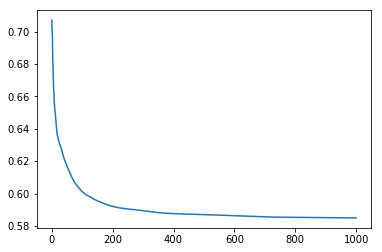

In [190]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], 10, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 1000)
plt.plot(Enet.getErrorTrace(), '-');

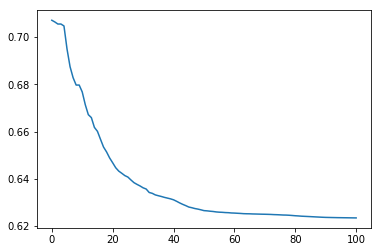

In [191]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [2]*2, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 100)
plt.plot(Enet.getErrorTrace(), '-');

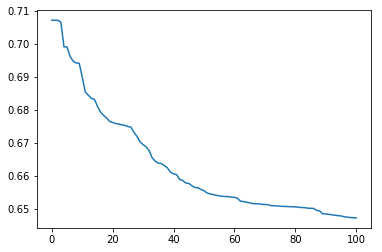

In [192]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [2]*4, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 100)
plt.plot(Enet.getErrorTrace(), '-');

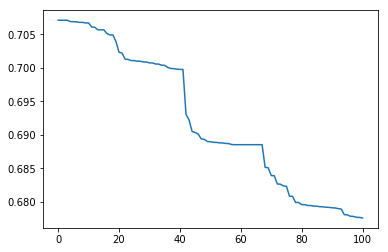

In [193]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [2]*8, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 100)
plt.plot(Enet.getErrorTrace(), '-');

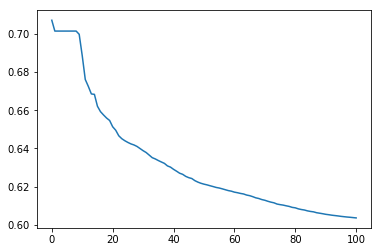

In [194]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [5]*2, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 100)
plt.plot(Enet.getErrorTrace(), '-');

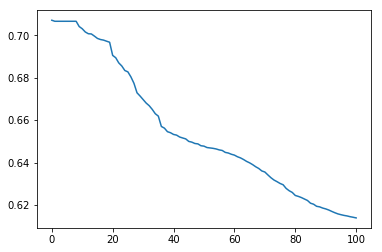

In [195]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [5]*4, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 100)
plt.plot(Enet.getErrorTrace(), '-');

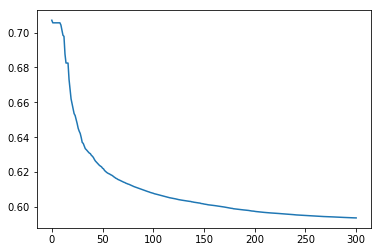

In [196]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [5]*2, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 300)
plt.plot(Enet.getErrorTrace(), '-');

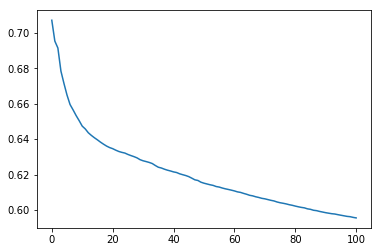

In [197]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [20]*1, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 100)
plt.plot(Enet.getErrorTrace(), '-');

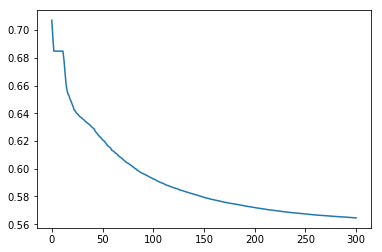

In [198]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [20]*1, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 300)
plt.plot(Enet.getErrorTrace(), '-');

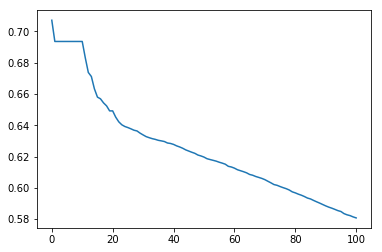

In [199]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [20]*2, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 100)
plt.plot(Enet.getErrorTrace(), '-');

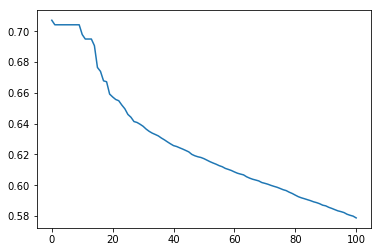

In [200]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [20]*4, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 100)
plt.plot(Enet.getErrorTrace(), '-');

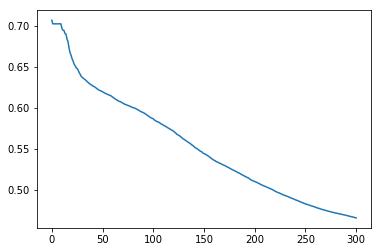

In [201]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [20]*4, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 300)
plt.plot(Enet.getErrorTrace(), '-');

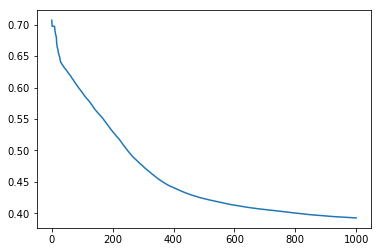

In [202]:
Enet = nn.NeuralNetwork(Xenergy.shape[1], [20]*4, Tenergy.shape[1])
Enet.train(Xenergy, Tenergy, 1000)
plt.plot(Enet.getErrorTrace(), '-');

In [ ]:
#just ran for too long, and time was running out :/
Er = trainNNs(Xenergy, Tenergy, 0.8, 
              [0, 5, [5]*8, [10]*4, [20]*4, [40]*2, 100, [3]*10, [15, 10, 3, 10, 15], 50], 10, 250, classify=False)
Es = summarize(Er)
Eb = bestNetwork(Es)
Eb

In [204]:
Er = trainNNs(Xenergy, Tenergy, 0.8, 
              [0, 5, [2]*8, [5]*4, [15]*3, [25]*2, 75, [3]*5, [10, 5, 3, 5, 10], 30], 5, 50, classify=False)
Es = summarize(Er)
Eb = bestNetwork(Es)
Eb

[75, 64.549817358379428, 64.887028688838299, 43.71610355377197]

#### Frogs

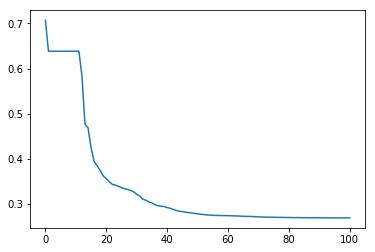

In [215]:
Fnet = nn.NeuralNetwork(Xanuran.shape[1], 2, Tanuran.shape[1])
Fnet.train(Xanuran, Tanuran, 100)
plt.plot(Fnet.getErrorTrace(), '-');

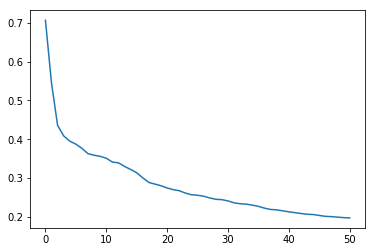

In [216]:
Fnet = nn.NeuralNetwork(Xanuran.shape[1], 200, Tanuran.shape[1])
Fnet.train(Xanuran, Tanuran, 50)
plt.plot(Fnet.getErrorTrace(), '-');

In [223]:
Fr = trainNNs(Xanuran, Tanuran, 0.8, 
              [0, 5, 10, 20, 50, [5]*3, 75, [3]*5, [10, 5, 10], 100], 5, 50, True)
Fs = summarize(Fr)
Fb = bestNetwork(Fs)
Fb

[100, 20.995170257123004, 0.0097289784572619879, 24.06473469734192]

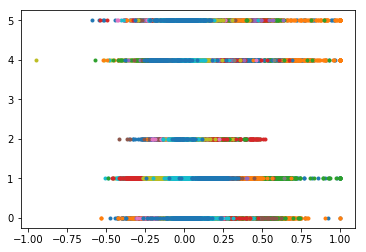

In [69]:
import mlutils as ml 
FXtrain, FTtrain, FXtest, FTtest = ml.partition(Xanuran,Tanuran,(.8, .2), True)
Fnet = nn.NeuralNetworkClassifier(FXtrain.shape[1], 100, len(np.unique(FTtrain)))
Fnet.train(FXtrain, FTtrain, 50, True)
FYtest = Fnet.use(FXtest)
plt.plot(FXtest, FYtest, '.');

By the time I had most things working I was running out of time, and could not run for the best number of iterations.

In [70]:
%run -i "grader.py"


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.3, 6.3999999999999995, 0.6]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

--- 20/20 points. You correctly found that network [20, 20] is best.

C:\Users\BadMan\Google Drive\CS 440-001 (Introduction to Artificial Intelligence)\Assignments Execution Grade is 60/60

======================= The regression data set =======================

--- _/5 points. Read the data in energydata_complete.csv into va